# Breast Cancer Analysis Using Random Forest

In this program, Random Forest algorithm will be used to predict cancer diagnosis. 

## Import the libraries needed for the analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

The dataset is taken from Kaggle repository - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
import pandas as pd
d1 = pd.read_csv('data.csv')

Display the first 5 rows of the dataset.

In [4]:
d1.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Drop the Unnamed column because it has all NA's

In [6]:
d1.drop(['Unnamed: 32'], axis = 1, inplace= True)
d1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
d1.shape

(569, 32)

Check missing in the dataset

In [8]:
d1.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Count the number for both diagnosis. M stands for Malignant and B for Benign. 

In [9]:
d1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Predictor variables

In order to see the correlation between the variables, a heatmap is plotted.

<AxesSubplot:>

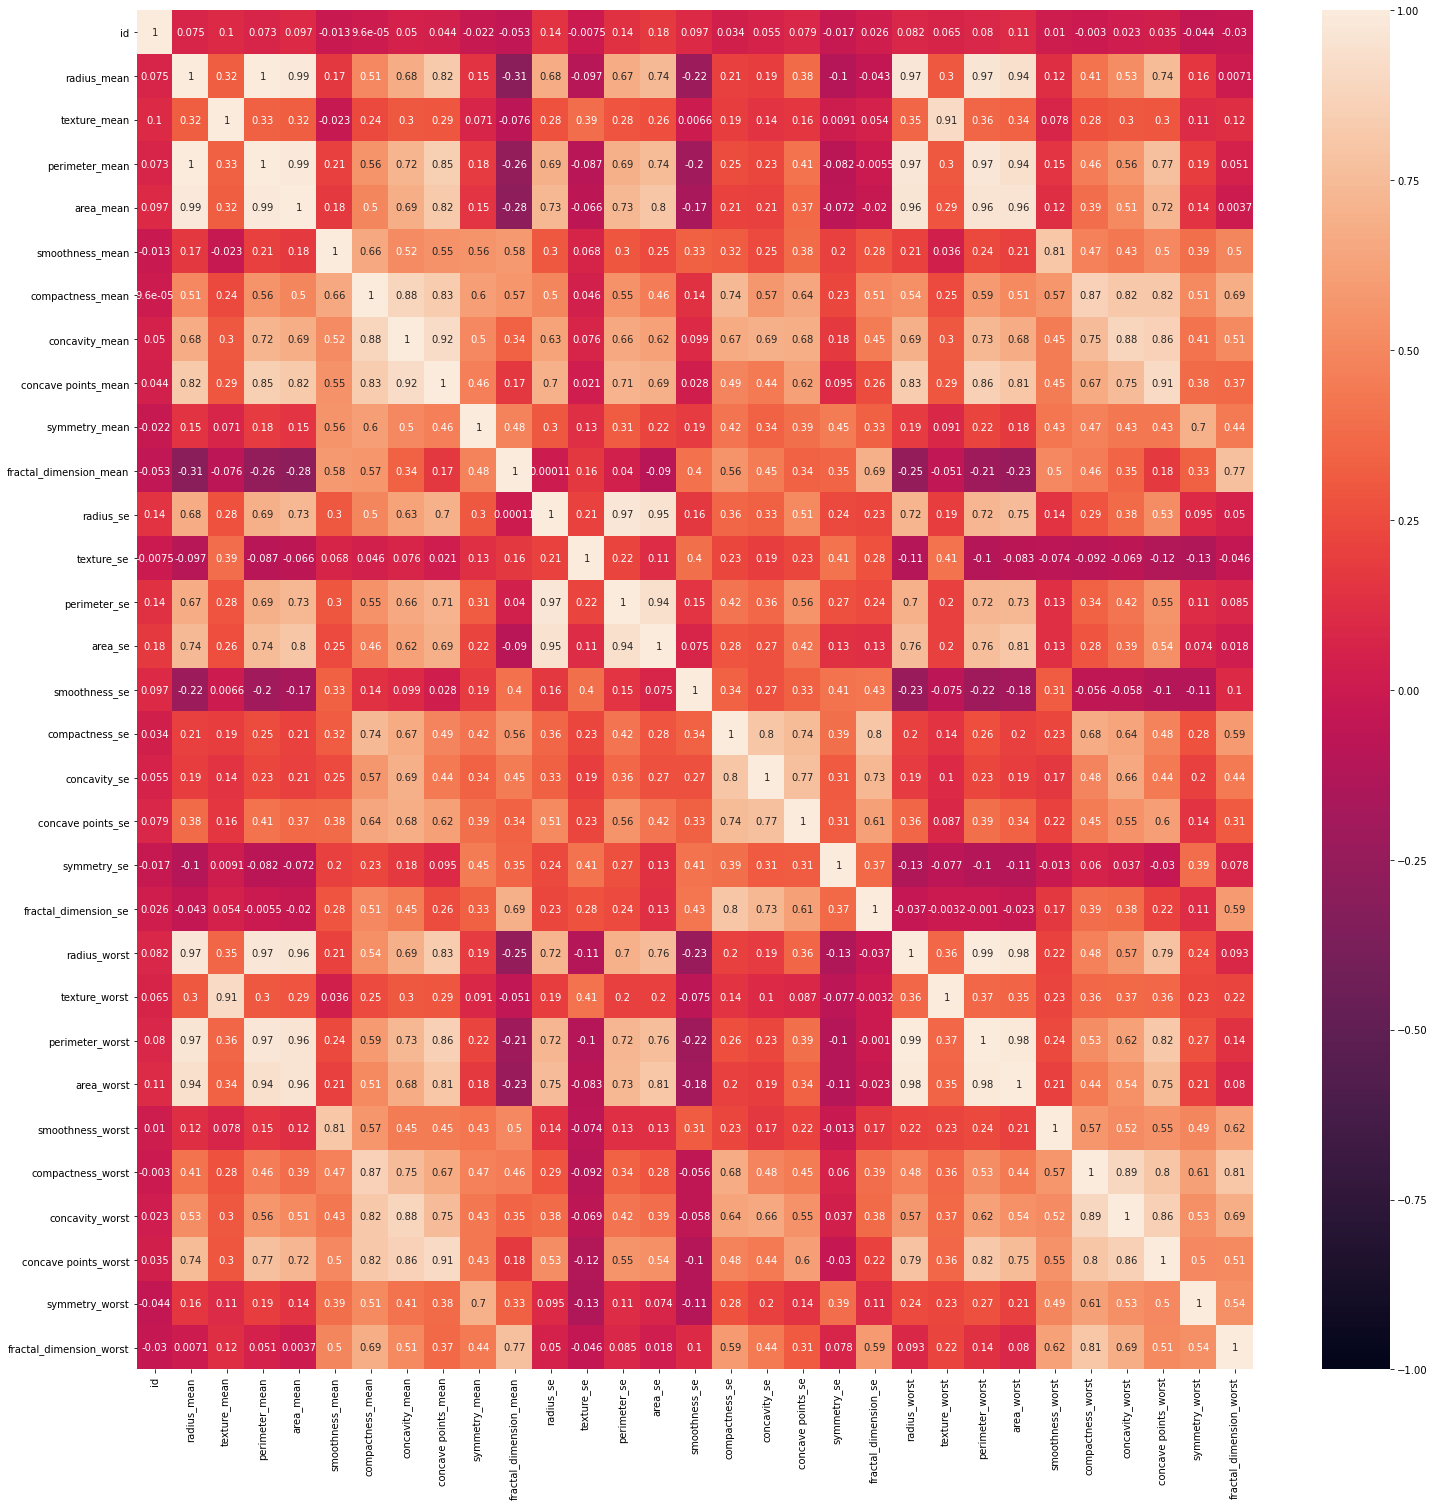

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(d1.corr(), vmin=-1, vmax=1, annot=True)

## Standardizing the data

In [11]:
std = (d1 - d1.mean())/ (d1.std())
std_data =pd.concat([d1['diagnosis'], std], axis=1)
std_data.describe()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
count,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-2.185325e-16,-1.186319e-16,0.000000,1.998011e-16,1.748260e-16,-3.496520e-16,-4.995028e-17,1.873136e-17,2.122887e-16,3.746271e-17,...,-8.241796e-16,1.623384e-16,4.011632e-16,-2.122887e-16,1.748260e-16,9.365678e-17,2.622390e-16,6.243785e-17,-1.201929e-16,1.248757e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.453164e+00,-7.371804e-01,-1.221348,-1.608721e+00,-1.296957e+00,-1.442609e+00,-1.260710e+00,-1.911765e+00,-1.743529e+00,-1.113893e+00,...,-1.725382e+00,-3.109349e+00,-1.774504e+00,-2.680337e+00,-2.741705e+00,-1.531542e+00,-2.159060e+00,-2.227289e+00,-1.552898e+00,-2.222039e+00
25%,-6.666089e-01,-4.943192e-01,-0.641571,-7.464292e-01,-6.923171e-01,-6.804845e-01,-7.372951e-01,-6.738971e-01,-7.557349e-01,-7.430941e-01,...,-6.743279e-01,-7.103378e-01,-6.234697e-01,-6.906227e-01,-7.026215e-01,-6.511078e-01,-6.412994e-01,-7.253249e-01,-6.941984e-01,-7.479711e-01
50%,-2.949274e-01,-3.474770e-01,-0.340881,-2.217454e-01,-2.807733e-01,-2.692639e-01,-3.973715e-01,-1.403723e-01,-2.232725e-01,-3.419391e-01,...,-2.688030e-01,-3.486040e-02,-2.201415e-01,-4.680159e-02,-7.156354e-02,-2.192375e-01,-1.272975e-01,-1.045442e-01,-1.973239e-01,-4.347738e-02
75%,3.631877e-01,1.066787e-01,0.357275,4.934227e-01,3.893116e-01,5.391944e-01,6.463664e-01,4.722412e-01,7.118836e-01,5.255994e-01,...,5.215568e-01,6.356397e-01,3.680315e-01,5.970195e-01,5.303125e-01,3.553798e-01,4.497425e-01,5.836621e-01,4.661422e-01,6.577623e-01
max,5.245913e+00,1.103214e+01,5.924959,4.564409e+00,6.138081e+00,5.108382e+00,3.924477e+00,6.643755e+00,2.683516e+00,4.239858e+00,...,4.090590e+00,4.766717e+00,8.022940e+00,3.951897e+00,4.480808e+00,7.065700e+00,6.040726e+00,4.647799e+00,6.649429e+00,3.882489e+00


In [12]:
#Importing the relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import xgboost


#Splitting the data

y = d1['diagnosis']
X = d1.drop(['diagnosis'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)


#Creating a function to calculate accuracy/precision scores

def scores(target_test, predicted):
    ac=accuracy_score(target_test, predicted)
    precision = precision_recall_fscore_support(target_test, predicted, labels = ['M'])[0]
    recall = precision_recall_fscore_support(target_test, predicted, labels = ['M'])[1]
    fscore = precision_recall_fscore_support(target_test, predicted, labels = ['M'])[2]
    print(f" Accuracy is {ac}")
    print(f" Precision is {precision}")
    print(f" Recall is {recall}")
    print(f" F Score is {fscore}")

In [13]:
rf = RandomForestClassifier(random_state = 42)
rf = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
scores(y_test, pred)

 Accuracy is 0.972027972027972
 Precision is [0.98076923]
 Recall is [0.94444444]
 F Score is [0.96226415]


In [14]:
rf.feature_importances_

array([0.00526775, 0.02373396, 0.01573298, 0.05150888, 0.04755234,
       0.00659399, 0.01500942, 0.05111606, 0.09399558, 0.00363031,
       0.00566311, 0.00934925, 0.00550991, 0.03027882, 0.0218733 ,
       0.00429387, 0.00295133, 0.00721551, 0.00400218, 0.00466515,
       0.00554023, 0.10041434, 0.01620742, 0.13078582, 0.1192847 ,
       0.011366  , 0.0208812 , 0.05655397, 0.1086625 , 0.0134416 ,
       0.00691853])

In [25]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

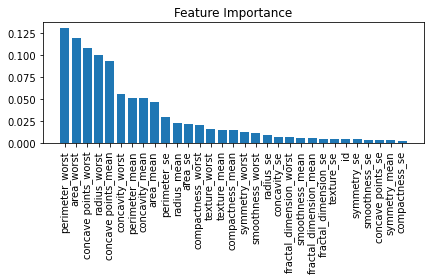

In [26]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# EDA

<Figure size 2160x2160 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

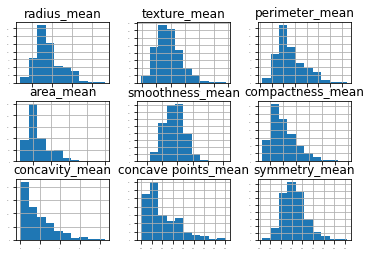

<Figure size 2160x2160 with 0 Axes>

In [39]:
plt.figure(figsize=(100, 100))
d1.iloc[:, 2:11].hist()
plt.rc('xtick', labelsize=0.001) 
plt.rc('ytick', labelsize=0.001) 
plt.figure(figsize=(30,30))




<Figure size 2160x2160 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

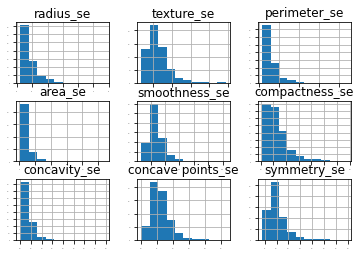

<Figure size 2160x2160 with 0 Axes>

In [40]:
plt.figure(figsize=(100, 100))
d1.iloc[:, 12:21].hist()
plt.rc('xtick', labelsize=0.001) 
plt.rc('ytick', labelsize=0.001) 
plt.figure(figsize=(30,30))



<Figure size 2160x2160 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

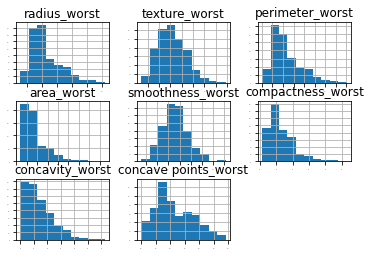

<Figure size 2160x2160 with 0 Axes>

In [41]:
plt.figure(figsize=(100, 100))
d1.iloc[:, 22:30].hist()
plt.rc('xtick', labelsize=0.001) 
plt.rc('ytick', labelsize=0.001) 
plt.figure(figsize=(30,30))

